# Welcome to Week 2
Last week you played with data and built models in a very practical way. This week, you will go deeper into theory and spend time on some foundational concepts.  This notebook is divided into two sections:

1. The Theory: an introduction to bias and variance - two key concepts in machine learning - and how they affect model performance
2. The Practice: a chance for you to experiment with how we deal with these concepts in practice

**You may finish the coding questions fairly quickly, but we expect you to spend most of your time teaching yourself the theoretical concepts** that come up in this notebook. We will use the 2-on-1 review session to test you on these concepts. Consequently, you should spend your time going through the below **resources** and playing with these concepts beyond this notebook.
### Resources (spend your time here!)
- [Caltech Learn from data](http://work.caltech.edu/telecourse.html ""): Seminal online course that introduces the theory of machine learning
- [Introduction to Statistical Learning](https://www-bcf.usc.edu/~gareth/ISL/ ""): Landmark textbook (and videos) on machine learning theory
- *Machine Learning* by Tom M. Mitchell: See chapters 5.2 & 5.3 (textbook available on our bookshelf)
- [Datacamp Supervised learning with scikit-learn](https://www.datacamp.com/courses/supervised-learning-with-scikit-learn ""): Practical walkthrough of some key concepts and their application
- [Understanding the Bias Variance Tradeoff](http://scott.fortmann-roe.com/docs/BiasVariance.html ""): Blog post on the topic of bias and variance
- [Kaggle Ensembling Guide](https://mlwave.com/kaggle-ensembling-guide/ ""): Ensembling guide
- [XGBoost tutorials](https://xgboost.readthedocs.io/en/latest/tutorials/model.html ""): XGBoost guide

### Collaboration Policy

Collaboration is the best way to learn. Try everything yourself first, then discuss your method with your teammates. Do not directly copy their code, unless you are trying to learn a programming technique. Do your own thinking and write your own code.

If you believe referring to someone's answer is the best way to learn, we recommend looking at the code, then walking away for a few minutes, and come back to write your own version of the code. There will be minimum policing, but we will check for direct copying of code.

Please list your collaborators:

1. Tupac Shakur
2. DQ

### Imports
This section should be reserved for packages/libraries you that you would normally use (you can add models/functions/libraries as you go along)

In [530]:
from sklearn.datasets import load_boston
from sklearn import model_selection
from sklearn import preprocessing
from sklearn import metrics
from sklearn import neighbors
from sklearn import tree
from sklearn import utils
from sklearn import feature_selection
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Dataset
Begin by loading the Boston House Prices dataset, or simply the Boston dataset, for our exploration. <br>
You can find it on Kaggle, or simply import it from the scikit-learn build-in datasets.

In [55]:
sam_adams = load_boston()
df_raw = pd.DataFrame(sam_adams['data'],columns = sam_adams['feature_names'])
df_raw['target'] = sam_adams['target']
df_raw.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
#print out the description
description = sam_adams['DESCR'].split('\n')
for des in description:
    print(des)
    

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

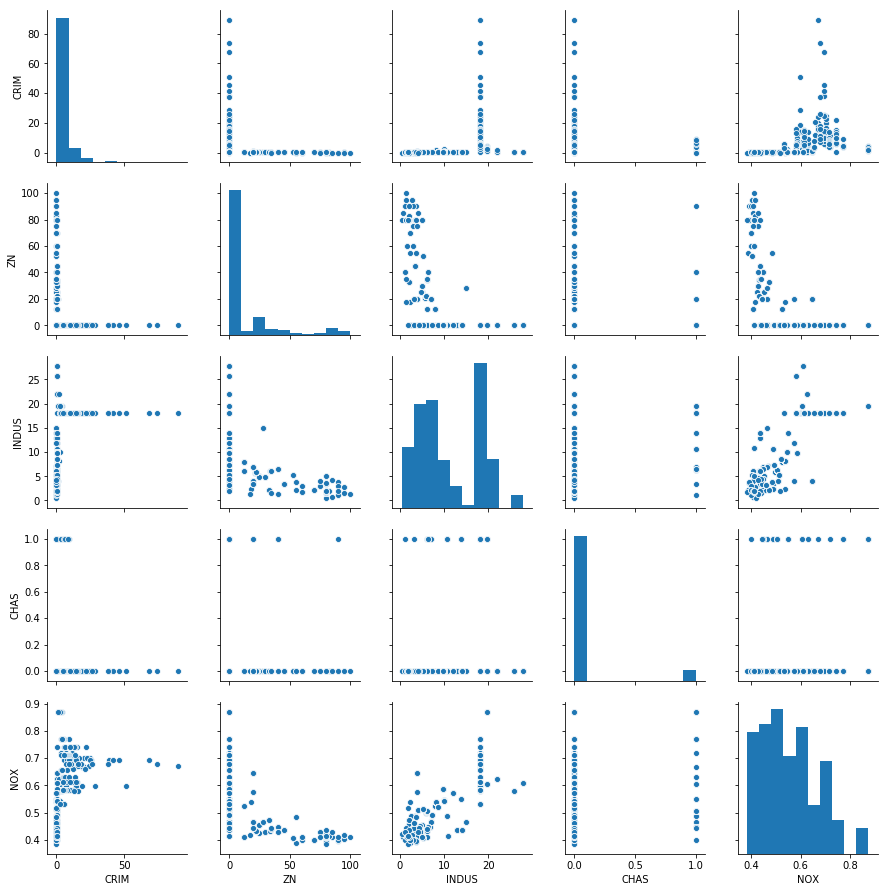

In [83]:
sns.pairplot(df_raw.iloc[:,:5])
# df_raw

# The Theoretical Side

In the first week, you learned about how to use some supervised learning algorithms. In this second week, we will go slightly deeper, to appreciate why machine learning works. We still stay in the realm of supervised learning, but many of the concepts learned here are applicable to general machine learning.

# 1. Model Complexity

We want to demonstrate the impact of implementing complicated models. <br> __Explore the dataset and choose one variable that you think can be most predictive of the target variable (price) in the Boston dataset.__ <br> (Please provide justification to the variable you chose in writing).  
<font color='blue'>The most predictie target variable would be the variable that has the greatest correlation with the target. As such, we can plot the correlation coefficients between each variable and the target, and choose the one with the largest absolute value.</font>

In [4]:
features = df_raw.columns
for feature in features:
    print(feature,np.corrcoef(df_raw[feature],df_raw['target'])[0,1])

CRIM -0.3858316898839905
ZN 0.36044534245054327
INDUS -0.4837251600283728
CHAS 0.1752601771902985
NOX -0.42732077237328275
RM 0.6953599470715394
AGE -0.3769545650045963
DIS 0.24992873408590394
RAD -0.38162623063977813
TAX -0.468535933567767
PTRATIO -0.5077866855375622
B 0.3334608196570664
LSTAT -0.737662726174015
target 1.0


_(Provide your verbal answer here)_
<font color='blue'>From the correlation coefficient plots, it appears that the feature with the strongest absolute correlation to the target is LSTAT, which is the % of lower status of the population in that house. A strong negative correlation is still a correlation!</font>

__Create a linear regression model, and try to predict the price based on the parameter you chose:__

In [5]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(df_raw['LSTAT'].iloc[:int(0.8*len(df_raw))].values.reshape(-1, 1),df_raw['target'].iloc[:int(0.8*len(df_raw))])
prediction = lr.predict(df_raw['LSTAT'].iloc[int(0.8*len(df_raw)):].values.reshape(-1,1))

__Extract the coefficients or weights of the linear model interpret what they mean.__ <br> Make sure you visualise the linear regression line and comment on how the line fits the data.

coefficient:-0.9617, intercept:35.0962
Train score 0.5021017168938468
Test score 0.1448676443361736


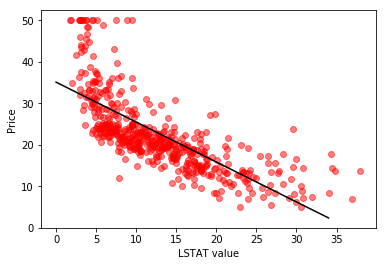

In [6]:
# plt.scatter(df_raw['target'].iloc[int(0.8*len(df_raw)):],prediction)
plt.scatter(df_raw['LSTAT'],df_raw['target'],color='r',alpha=0.5)
plt.plot(lr.predict(np.arange(35).reshape(-1,1)),color='k')
plt.xlabel('LSTAT value')
plt.ylabel('Price')
print('coefficient:{:.4f}, intercept:{:.4f}'.format(lr.coef_[0],lr.intercept_))
print('Train score',lr.score(df_raw['LSTAT'].iloc[:int(0.8*len(df_raw))].values.reshape(-1,1),df_raw['target'].iloc[:int(0.8*len(df_raw))]))
print('Test score',lr.score(df_raw['LSTAT'].iloc[int(0.8*len(df_raw)):].values.reshape(-1,1),df_raw['target'].iloc[int(0.8*len(df_raw)):]))

<font color='blue'>The best-fit line fits the data reasonably well in intermediate values of LSTAT, but it is obvious that the distribution of LSTAT values in relation to prices are non-linear. There is a general linear trend between LSTAT values of 10-25, with prices rising up rapidly at LSTAT values below 10, and prices bottoming out above LSTAT values above 30.</font>

Linear regression is considered a simple model, using a polynomial model introduces a higher complexity. <br>
__Find and implement two more models (with medium and high complexity) to predict the target variable, using the same variable you chose for the previous part__ (Be sure to visualize your result and comment about the fit).

Fit and plot your medium complexity model here:

coefficient,intercept [ 0.         -2.44319997  0.04767261] 43.55741498079278
Train Score: 0.6075690225775301
Test Score: 0.3270102092991529


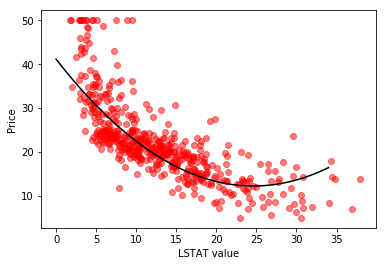

In [7]:
def medium_complexity(x_val):
#     x_val2 = np.log(x_val)
#     return np.array([x_val2]).T
    return preprocessing.PolynomialFeatures(degree=2).fit_transform(x_val.reshape(-1,1))

def medium_complex():
    x_in = medium_complexity(df_raw['LSTAT'].values)
    y_val = df_raw['target'].iloc[:int(0.8*len(df_raw))]
    lr.fit(x_in[:int(0.8*len(df_raw))],y_val)
    prediction = lr.predict(x_in[int(0.8*len(df_raw)):])
    plt.scatter(df_raw['LSTAT'],df_raw['target'],color='r',alpha=0.5)
    plt.plot(lr.predict(medium_complexity(np.arange(1,36))),color='k')
    plt.xlabel('LSTAT value')
    plt.ylabel('Price')
#     print('coefficient:{:.4f}, intercept:{:.4f}'.format(lr.coef_[0],lr.intercept_))
    print('coefficient,intercept',lr.coef_,lr.intercept_)
    print('Train Score:',lr.score(x_in[:int(0.8*len(df_raw))],df_raw['target'].iloc[:int(0.8*len(df_raw))]))
    print('Test Score:',lr.score(x_in[int(0.8*len(df_raw)):],df_raw['target'].iloc[int(0.8*len(df_raw)):]))
medium_complex()

<font color='blue'>Introducing a squared function gives the model a much better fit!</font>

Fit and plot your high complexity model here:

coefficient,intercept [ 0.00000000e+00 -1.14424850e+01  1.17939901e+00 -6.13715708e-02
  1.50820279e-03 -1.38818610e-05] 66.71217401116732
Train score: 0.653149995105269
Test score: 0.3796705349626388


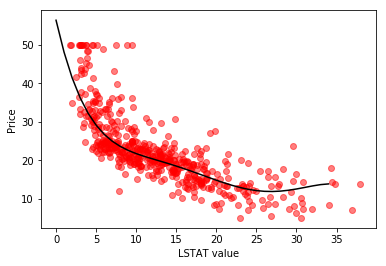

In [8]:
def high_complexity(x_val):
#     x_val2 = x_val**2
#     x_val3 = x_val**3
#     x_vallog = np.log(x_val)
#     return np.array([x_val,x_val2,x_val3,x_vallog]).T
    return preprocessing.PolynomialFeatures(degree=5).fit_transform(x_val.reshape(-1,1))

def high_complex():
    x_in = high_complexity(df_raw['LSTAT'].values)
    y_val = df_raw['target'].iloc[:int(0.8*len(df_raw))]
    lr.fit(x_in[:int(0.8*len(df_raw))],y_val)
    prediction = lr.predict(x_in[int(0.8*len(df_raw)):])
    plt.scatter(df_raw['LSTAT'],df_raw['target'],color='r',alpha=0.5)
    plt.plot(lr.predict(high_complexity(np.arange(1,36))),color='k')
    plt.xlabel('LSTAT value')
    plt.ylabel('Price')
    print('coefficient,intercept',lr.coef_,lr.intercept_)
    print('Train score:',lr.score(x_in[:int(0.8*len(df_raw))],df_raw['target'].iloc[:int(0.8*len(df_raw))]))
    print('Test score:',lr.score(x_in[int(0.8*len(df_raw)):],df_raw['target'].iloc[int(0.8*len(df_raw)):]))
high_complex()

<font color='blue'>Introducing both a logarithmic function and some power functions improved the training set fit.</font>

Use the following section to answer: which of the models has the best fit and why?

<font color='blue'><s>It appears that the pure logarithmic model has the best fit.</s> The polynomial model with terms up to the 5th power appears to have the best fit!</font>

__Find a quantitative way of measuring the model fit__ <br>
Calculate it for each one of the models and compare the results to your visual inspection interpretation:

<font color='blue'>The $r^2$ score is used for measuring the model's fit. <s> $r^2$ scores are printed above.  
    $r^2$ goes from 0.50 to 0.63 to 0.65 with increasing model complexity.</s> The training score improves with increasing model complexity, from 0.50 to 0.61, to 0.65 as the powers increase from 1 to 2 to 5.</font>

If you did the exercise right, you should see the visual and quantative fit increase in the same direction as the model complexity. 


##### But is fitness a good measure of a model?
In order to put this question to the test, __perform a cross-validation test for the three models and compare between them:__

In [76]:
def score_model(X,y,lr,printraw=False):
    kf = model_selection.KFold(n_splits=5)
    validation_score=[]
    mse=[]
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        lr.fit(X_train,y_train)
        validation_score.append(lr.score(X_test,y_test))
        prediction = lr.predict(X_test)
        mse.append(metrics.mean_squared_error(prediction,y_test))
    if printraw:
        print(validation_score)
    return np.mean(validation_score),np.mean(mse)

print('Poly degree 1',score_model(df_raw['LSTAT'].values.reshape(-1,1),df_raw['target'],lr))
poly = preprocessing.PolynomialFeatures(degree=2)
print('Poly degree 2',score_model(poly.fit_transform(df_raw['LSTAT'].values.reshape(-1,1)),df_raw['target'],lr))
print(poly.n_output_features_)
poly = preprocessing.PolynomialFeatures(degree=3)
print('Poly degree 3',score_model(poly.fit_transform(df_raw['LSTAT'].values.reshape(-1,1)),df_raw['target'],lr))
print(poly.n_output_features_)
poly = preprocessing.PolynomialFeatures(degree=5)
print('Poly degree 5',score_model(poly.fit_transform(df_raw['LSTAT'].values.reshape(-1,1)),df_raw['target'],lr))
print(poly.n_output_features_)

Poly degree 1 (0.29710984600668633, 42.618472789410596)
Poly degree 2 (0.4337910696940484, 33.88330525749241)
3
Poly degree 3 (0.45794903499044876, 32.01645288778347)
4
Poly degree 5 (0.5011849272365574, 29.92570038634355)
6


What measure did you use to compare between the models and why? <br>
Which one fits the data the best? Explain that result

<font color='blue'>The $r^2$ score is used to compare fit. In this sense, the higher the model complexity (up to 5), the better the fit. However, if the model is measured by the mean squared error, the model with a complexity of 2 is the best performer.</font>

Let's try to extend this discussion by including all the remaining variables in the Boston dataset. <br> __Fit the three models, use _all_ the variables in the Boston dataset and compare their cross validation scores.__ <br> See if you observe the same patterns as when using one variable.

In [10]:
print('Poly degree 1',score_model(df_raw.drop(labels='target',axis=1).values,df_raw['target'],lr))
poly = preprocessing.PolynomialFeatures(degree=2)
print('Poly degree 2',score_model(poly.fit_transform(df_raw.drop(labels='target',axis=1)),df_raw['target'],lr))
print('nfeatures ', poly.n_output_features_)
poly = preprocessing.PolynomialFeatures(degree=5)
print('Poly degree 5',score_model(poly.fit_transform(df_raw.drop(labels='target',axis=1)),df_raw['target'],lr))
print('nfeatures ',poly.n_output_features_)

Poly degree 1 (0.3507413509325278, 37.22284363713827)
Poly degree 2 (-7.150875122590082, 275.19381737255037)
nfeatures  105
Poly degree 5 (-1692552.5374785098, 45111444.94035606)
nfeatures  8568


- For each model, explain the differences you encountered when expanding the dataset.<br>
- Compare the current result between models and try to explain it.

<font color='blue'>When doing a polynomial expansion, the power features increase at an exponential rate. The model features very quickly start to overwhelm the data, and at the 5th degree, there are already 8568 features.</color>

Share your thoughts/conclusions regarding complexity in modeling:

<font color='blue'>Model complexity in general decreases the bias at the expense of increasing the variance of the model. It can capture non-linear complexities of the underlying data, but at the same time, it is prone to overfitting, and the expansion of the number of terms lead to an excess of features.</font>

__Expending our discussion on model complexity, comment below how one can decrease/increase complexity in the following families of algorithms:__ 
- Decision tree 
- Artificial neural network 
- Support vector machine
- K-nearest neighbour
- Bayesian method (optional)

<font color='blue'>
    
1. Model complexity can be increased by increasing the max_depth, decreasing the minimum samples in a leaf, and increasing maximum number of leaf nodes.
2. ANN complexity can be increased by increasing the number of neurons, and adding more hidden layers.
3. If the SVM is using a polynomial kernel, model complexity can be increased by increasing the degree. 
4. Decreasing K will increase model complexity. 
5. Bayesian method. In a gaussian process, the selection of more and higher level kernels can increase model complexity.
</font>

__Provide the best explanation/definition (using your own words) of over/under-fitting:__

<font color='blue'>In an over fitted model, the model performance on the training set is much higher than its performance on the test set. It is an indication that the model is 'memorizing' the answers in the train set, and is not as generalizable to data not within the training set.  
In an under-fitted model, the model performance on both the training and test set is low.</font>

# 2. Bias Variance Trade-Off

One might claim machine learning is about balancing. If that's the case, what measure can we use to find the right balance? 

From a more theoretical perspective, two useful measures are bias and variance.<br>
In an intuitive sense, __bias__ is how off-the-mark our prediction/estimate tends to be with respect to the true value we are trying to predict. Usually we get bias because of inherent limitation in the model/algorithm we choose, for example linear regression is limited only to fit linear patterns, and hence "biased" towards linearity. <br>
__Variance__ is how flexible the predictions made by the model can be to fit more complicated patterns in data. Highly complex models tend to have high variance. This comes as a cost; as flexibility increases, the sensitivity of the models to the training data that they try to fit increases, resulting in the predictions being more distributed away from the true values. 

__This is just the tip of the iceberg, we encourage you to pause your work on the notebook for now and seek more information about the relationship to get a better understanding before we dive in.__

Bias and variance is a trade-off, increasing one decreases the other.<br> __Provide an explanation to why this is so:__


<font color='blue'>A high bias is a result of the model not capturing the underlying features within the data. However, it can be hard for a model to tell what is a underlying feature, and what is a statistical fluke. Increasing the complexity of the model helps to reduce the model bias, but at the same time might result in the model learning features that are not generalizable outside the training dataset.  
After completing the tests below, I have a new understanding. Given some data, and given some model to predict that data, bias will be 0 if the model prediction exactly fits the curve of the data. However, variance will be 0 if the model predicts the exact same value every time. Therefore, as the model prediction moves from predicting the same vale every single time to something more like the shape of the data, the bias will drop, but the variance will increase.</font>

__Provide mathematical formulas for the bias, the variance and the overall prediction error of a model:__

<font color='blue'>
For a training set with data drawn from a function $y=f(x)+\epsilon$, we attempt to learn the model $\hat{f}(x)$ that best approximates the true function.  
We can decompose the model's error on an unseen sample $x$ as 
$$E[(y-\hat{f}(x))^2]=(Bias[\hat{f}(x)])^2+Var[\hat{f}(x)]+\sigma^2 $$
where
$$Bias[\hat{f}(x)]=E[\hat{f}(x)-f(x)]$$
and
$$Var[\hat{f}(x)]=E[\hat{f}(x)^2]-(E[\hat{f}(x)])^2$$
</font>

Shifting our focus to a more practical approach, we will now try and demonstrate how to find the right balance between bias variance when fitting a model. 

__Define a high order polynomial curve to fit:__ <br>
(One example is: $f(x)=0.2x^{5}-3.5x^{4}+21x^{3}-53x^{2}+37x+0.6$ (you are free to define another function)

In [384]:
def make_y(x):
    return 0.2*x**5 - 3.5*x**4 + 21*x**3 -53*x**2 + 37*x + 0.6

Plot the function you created:

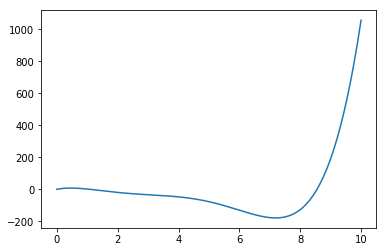

In [511]:
input_x=np.arange(0,10,0.01)
output = make_y(input_x)
plt.plot(input_x,output);

Our goal is to estimate this function using polynomial regression. In real-life cases, the true function is not accessible to us, only noisy estimates around it.

__Now, simulate a training data by introducing random errors on the curve.__<br>The training data should look like the figure below (make sure you have at least a 1000 observations).

<img src="./training_data.png">

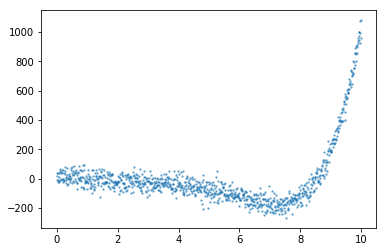

In [513]:
noise = np.random.normal(0,40,len(output))
noisy = output+noise
plt.scatter(input_x,noisy,alpha=0.5,s=2);

Spare a few hundreds samples to use as the validation set (and plot it):

200 800


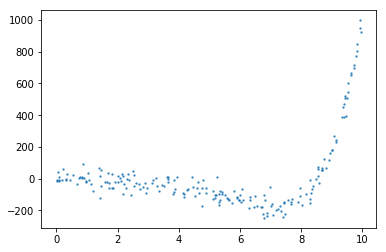

In [514]:
shuffleindex=np.arange(len(noisy))
np.random.shuffle(shuffleindex)
X_all = input_x[shuffleindex]
y_all = noisy[shuffleindex]

# save 200 points to be used as the validation set
X_test = X_all[:200]
y_test = y_all[:200]
X_train = X_all[200:]
y_train = y_all[200:]
print(len(y_test),len(y_train))
plt.scatter(X_test,y_test,alpha=0.7,s=2);

Using the remaining data, build 500 linear regression models, each by randomly sampling 80 observations from the pool:

In [495]:
def train_model(X_train,y_train,X_test):
    all_models = np.empty([len(y_test),500])
    for ii in range(500):
        sampleindex = np.random.choice(len(y_train),80,replace=False)
        xx_train = X_train[sampleindex]
        yy_train = y_train[sampleindex]
        lm = LinearRegression()
        if(np.shape(np.shape(X_train))[0]<=1):
            lm.fit(xx_train.reshape(-1,1),yy_train)
            prediction = lm.predict(X_test.reshape(-1,1))
        else:
            lm.fit(xx_train,yy_train)
            prediction = lm.predict(X_test)
        all_models[:,ii] = prediction
    return all_models
all_models = train_model(X_train,y_train,X_test)

__Calculate the bias square and variance of linear regression by predicting (using the 500 models) the values of the validation set above, and comparing them against the true values from the polynomial curve defined earlier.__ <br> (refer to the bias variance formula to do the calculation)

In [496]:
# print('model biassq' ,np.mean(biassq), 'var',np.mean(variance))
# truebiassq = bias_calc(noisy,output)
# truevar = var_calc(output)
# print('true biassq', truebiassq, 'var',truevar)

def bias_calc(x,y):
    return (np.mean(x-y))**2
def var_calc(x):
    return np.mean(x**2)-np.mean(x)**2
def overall_bias_var(models):
    biassq=[]
    variance=[]
    mse=[]
    for ii,row in enumerate(models):
        biassq.append(bias_calc(row,y_test[ii]))
        variance.append(var_calc(row))
#     print(np.mean(np.array(biassq)),np.mean(np.array(variance)))
    for jj in range(np.shape(models)[1]):
        mse.append(metrics.mean_squared_error(y_test,models[:,jj]))
#     mse = metrics.mean_squared_error(y_test,np.mean(models,axis=1))
    return np.mean(np.array(biassq)),np.mean(np.array(variance)),np.mean(np.array(mse))
print('bias,var= ',overall_bias_var(all_models))


bias,var=  (44565.49642466391, 1433.311989316012, 45998.80841397992)


Repeat the whole procedure of calculating bias variance, but this time using polynomial of degrees 2, 3, 4, ..., 15

In [515]:
biassq_all=[]
variance_all=[]
mse_all=[]

for degree in range(2,16):
    print('degree: ',degree)
    X_all_new = preprocessing.PolynomialFeatures(degree=degree).fit_transform(X_all.reshape(-1,1))
    X_test = X_all_new[:200]
    y_test = y_all[:200]
    X_train = X_all_new[200:]
    y_train = y_all[200:]
    all_model_pred = train_model(X_train,y_train,X_test)
    biass,variancee,msee = overall_bias_var(all_model_pred)
    biassq_all.append(biass)
    variance_all.append(variancee)
    mse_all.append(msee)
    print(biass,variancee,msee,biass+variancee)

degree:  2
22804.661945440304 1467.9719679943748 24272.633913434678 24272.633913434678
degree:  3
7104.009027640447 821.2661870184132 7925.275214658861 7925.27521465886
degree:  4
2162.8648680343154 177.45730007440994 2340.322168108721 2340.3221681087252
degree:  5
1631.1061714260259 131.4687297978902 1762.5749012239119 1762.5749012239162
degree:  6
1644.3674721977732 170.76161342490587 1815.1290856226772 1815.129085622679
degree:  7
1639.1435879887745 229.71263719974112 1868.856225188517 1868.8562251885155
degree:  8
1631.6466482589913 310.88370034279035 1942.5303486017788 1942.5303486017815
degree:  9
1618.2126004568681 2041.7073482343058 3659.9199486911716 3659.919948691174
degree:  10
1647.6092518725238 778.9506070113921 2426.5598588839116 2426.5598588839157
degree:  11
1651.2397630186047 1611.9094234566073 3263.1491864752097 3263.149186475212
degree:  12
1639.1672428246948 12078.478485141675 13717.645727966361 13717.64572796637
degree:  13
1638.535089721181 10194.795967889644 1183

Plot the bias and variance (as y) vs. the model complexity/polynomial degree (as x)

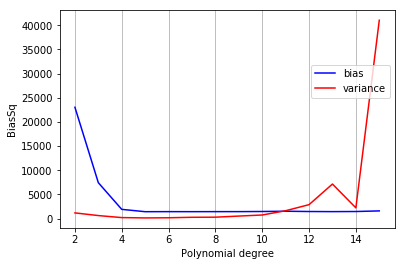

In [498]:
fig,ax1=plt.subplots()
ax1.plot(np.arange(2,16),biassq_all,color='blue',label='bias')
ax1.set_ylabel('BiasSq')
plt.legend(bbox_to_anchor=(0.75, 0.85), loc=2, borderaxespad=0.)
# ax2=ax1.twinx()
ax1.plot(np.arange(2,16),variance_all,color='red',label='variance')
# ax2.set_ylabel('Variance/mse')
# ax1.plot(np.arange(2,16),np.array(biassq_all)+np.array(variance_all),color='green',label='mse')
ax1.grid(which='both',axis='x')
ax1.set_xlabel('Polynomial degree')
plt.legend(bbox_to_anchor=(0.75, 0.75), loc=2, borderaxespad=0.)
plt.show()

Where is the optimal balance point? Which polynomial degree is that? <br>
Find out more and elaborate on the meaning and importance that point of balance.

<font color='blue'>It appears that the optimal balance is at polynomial degree 5. Beyond that point, the bias does not drop further with increasing complexity. At very high values (>10), the variance actually increases.</font>

# The Practical Side 

Bias-variance trade-off is one of the most critical components of model tuning. You will need to find the right point in terms of model complexity to derive the best results for your model.

In practice, however, it is impossible to calculate bias and variance for an actual dataset. Try to explain why this is impossible below:

<font color='blue'> You can only get a sample and hence sample bias? </font>

Repeat the procedure you used to calculate bias-variance above, but this time calculate mean squared error instead. <br> Overlay the MSE on the bias variance plot earlier and comment on the observation.

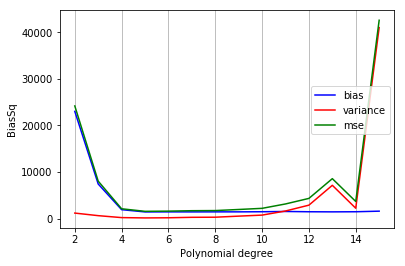

In [499]:


fig,ax1=plt.subplots()
ax1.plot(np.arange(2,16),biassq_all,color='blue',label='bias')
ax1.set_ylabel('BiasSq')
plt.legend(bbox_to_anchor=(0.75, 0.85), loc=2, borderaxespad=0.)
# ax2=ax1.twinx()
ax1.plot(np.arange(2,16),variance_all,color='red',label='variance')
# ax2.set_ylabel('Variance')
plt.legend(bbox_to_anchor=(0.75, 0.75), loc=2, borderaxespad=0.)
# ax3=ax1.twinx()
ax1.plot(np.arange(2,16),mse_all,color='green',label='mse')
# ax3.spines["right"].set_position(("axes", 1.2))
# ax3.set_ylabel('mse')
ax1.grid(which='both',axis='x')
ax1.set_xlabel('Polynomial degree')
plt.legend(bbox_to_anchor=(0.75, 0.65), loc=2, borderaxespad=0.)
plt.show()

<font color='blue'>The MSE is the combination of the bias and variance. It reaches a mean at the optimal point with the lowest combined bias and variance.</font>

# 3. Out-of-sample Validation

Hence, we will go back to using mean squared errors (MSE) to tune our models. In reality, validation error is the most reliable source of information you can get, provided you do validation properly. You might have realised that MSE scores are negative when you put them through the `cross_val_score` method - do think about why this is so as well.

If you would like to do any data exploration, you can do them here.

10000.0
0.9893318451978531
rss 80000.0
tss 7498953.800698582
R2 0.9893318451978531
[ 102.71828183  107.3890561   120.08553692  154.59815003  248.4131591
  503.42879349 1196.63315843 3080.95798704] [2.71828183e+00 7.38905610e+00 2.00855369e+01 5.45981500e+01
 1.48413159e+02 4.03428793e+02 1.09663316e+03 2.98095799e+03]
pearson 1.0000000000000004


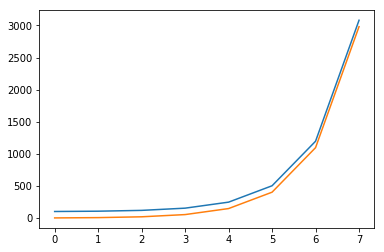

In [510]:
'''
r2 is the coefficient of determination
r2 in stats is the pearson correlation coefficient.
They are 2 different things!
a log transform will result in a very high coefficient of determination
but also a very high mse!
'''

pred=np.exp(np.array([1,2,3,4,5,6,7,8]))
actual=pred+100
print(metrics.mean_squared_error(actual,pred))
print(metrics.r2_score(actual,pred))
rss=np.sum((actual-pred)**2)
tss=np.sum((actual-np.mean(actual))**2)
print('rss',rss)
print('tss',tss)
print('R2',1-(rss/tss))
(print(actual,pred))
plt.plot(actual)
plt.plot(pred)
n=len(pred)
r = ( n*np.sum(pred*actual)-np.sum(pred)*np.sum(actual) )/ \
    ( np.sqrt( (n*np.sum(pred**2)-(np.sum(pred)**2))*(n*np.sum(actual**2)-(np.sum(actual)**2)) ) )
print('pearson',r)

In [253]:
# weird CV split testing
def cv_test(fold):
    lr = LinearRegression()
    X=df_raw.drop('target',axis=1)
    y=df_raw['target']
    X,y=utils.shuffle(X,y)
    results = model_selection.cross_val_score(lr,X,y,cv=fold,scoring='neg_mean_squared_error')
    results2 = model_selection.cross_val_score(lr,X,y,cv=fold,scoring='r2')
#     print(results)
    return [np.mean(results),np.mean(results2)]
cv_mse_score=[]
for ii in range(2,len(df_raw)+1):
    cv_mse_score.append(cv_test(ii))

<Figure size 432x288 with 0 Axes>

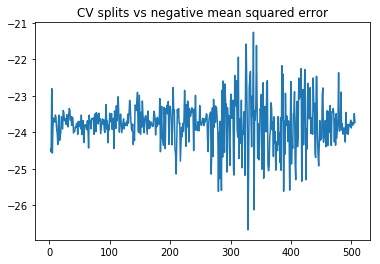

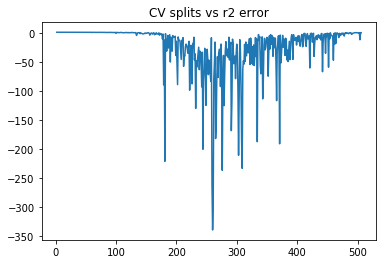

In [141]:
cv_mse_score=np.array(cv_mse_score)
plt.figure(1)
fig,ax=plt.subplots()
ax.plot(np.arange(2,len(df_raw)+1),cv_mse_score[:,0])
ax.set_title('CV splits vs negative mean squared error')
plt.figure(2)
fig,ax=plt.subplots()
ax.plot(np.arange(2,len(df_raw)+1),cv_mse_score[:,1])
ax.set_title('CV splits vs r2 error')
plt.show()

<Figure size 432x288 with 0 Axes>

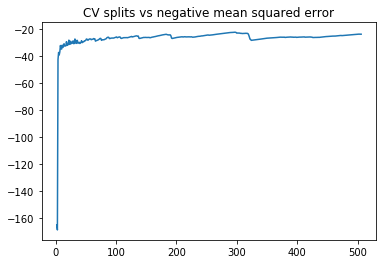

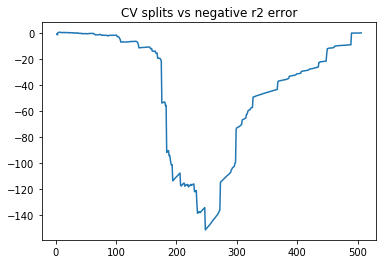

In [92]:
cv_mse_score=np.array(cv_mse_score)
plt.figure(1)
fig,ax=plt.subplots()
ax.plot(np.arange(2,len(df_raw)+1),cv_mse_score[:,0])
ax.set_title('CV splits vs negative mean squared error')
plt.figure(2)
fig,ax=plt.subplots()
ax.plot(np.arange(2,len(df_raw)+1),cv_mse_score[:,1])
ax.set_title('CV splits vs r2 error')
plt.show()

In [110]:
random_r2=[]
for i in range(1,50):
    trials=[]
    for ii in range(100):
        trials.append(metrics.r2_score(np.random.normal(size=i),np.random.uniform(size=i)))
    random_r2.append(np.mean(trials))

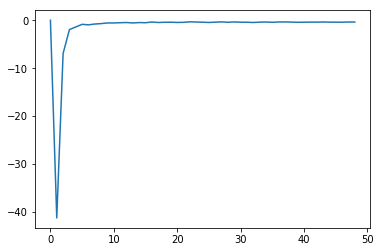

In [142]:
plt.plot(random_r2)

We will begin by building simple baseline models for our dataset. We will start with 3 baseline models: linear regression, k-nearest neighbours and decision trees. Build a simple regression model for each of them. Evaluate and report their performance, and identify the best model by preliminary performance.

## 3.1 Linear Regression

In [72]:
def linear_regression_test():
    lr = LinearRegression()
    X=df_raw.drop('target',axis=1)
    y=df_raw['target']
    results = model_selection.cross_val_score(lr,X,y,cv=5,scoring='neg_mean_squared_error')
    print(results)
    return(results)
print(np.mean(linear_regression_test()),np.std(linear_regression_test()))

[-12.48065021 -26.09620267 -33.11995587 -80.83305378 -33.58435565]


-37.222843637138396

## 3.2 K-Nearest Neighbours

In [71]:
def knn_regression_test():
    knn = neighbors.KNeighborsRegressor()
    X=df_raw.drop('target',axis=1)
    y=df_raw['target']
    results = model_selection.cross_val_score(knn,X,y,cv=5,scoring='neg_mean_squared_error')
    print(results)
    return results
np.mean(knn_regression_test())


[ -72.84204314  -77.44044752 -114.19790495  -89.00506931  -31.22948515]


-76.9429900135896

## 3.3 Decision Tree

In [75]:
def tree_regression_test():
    dt = tree.DecisionTreeRegressor()
    X=df_raw.drop('target',axis=1)
    y=df_raw['target']
    results = model_selection.cross_val_score(dt,X,y,cv=5,scoring='neg_mean_squared_error')
    print(results)
    return results
np.mean(tree_regression_test())

[-12.2095098  -51.84683168 -28.97920792 -55.12841584 -65.68683168]


-42.770159386526885

## Theoretical Considerations

How do we ensure that our models are reliably evaluated? Specifically, in the area of out-of-sample validation, how do we decide to use `train_test_split` vs `cross_val_score`?

<font color='blue'>Using the cross_val_score ensures that all your data is used for training, and can be a very robust method to obtain model accuracy. However, there is a strong assumption that all your data points are uncorrelated with each other. In the situation where you are using data that has a strong autocorrelation (e.g. in time series modelling), splitting the model using cross validation might be a better idea since you can train only on data before a certain point in time, then evaluate on points after.</font>

Given that the dataset has only ~500 rows of data, what are the challenges we face, and how can we best mitigate these issues?

<font color='blue'>The challenge is that there may be too little data points to build a robust model. The datapoints might not cover the full range of 'real' values, and might have a distribution that is not the same as the population. Use bootstrapping to create artificially train on differnt distributions of the training data. We can also tend towards less complex models with fewer hyperparameters to reduce the chances of overfitting on the data. We can also go get more data points.</font>

# 4. Hyperparameter exploration

We will now start to look at hyperparameters for these models. Considering between the 3 models, k-nearest neighbours probably has the least hyperparameters to tune, and is also the simplest computationally. Hence, let's start with k-nearest neighbours. You might not want to try all of these parameters, considering limited time. This is a good time to do some research with respect to what parameters to optimise.

When conducting a parameter search, the idea of grid search immediately comes to mind. Why do we usually use grid search, and in what situations should we use other search options?

<font color='blue'>Grid search enables us to exhaustively search all hyperparameters. It is usful because the hyperparameter space may not necessarily be smooth, hence optimization techniques may not necessarily work. In addition, certain hyperparameters are categorical, so it may totally change the results when categories change, and the other hyperparameters might not continue to work.  
    <br>
If there are too many hyperparameters to tune, we could also use random search to randomly select a combination of hyperparameters and to see which works best.</font>

Why do we not use gradient descent to identify the right parameters?

<font color='blue'>Hyperparameter tuning is not smooth and not convex. The convergence theory in gradient desent assumes that the space is convex. As a result you will likely not converge to some minimum. The extreme non-smoothness also means you are very likely to end up in some local optimal.</font>

## 4.1 KNN

In [314]:
neighbors.KNeighborsRegressor().get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': 1,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

<font color='blue'>Weights: uniform or distance based. KNN works by taking the average value of K neighbours to make the prediction. if the weights are uniform, each value is treated equally. In distance, the K points are weighed by the distance to the query point with closer points having a higher weight than further ones.  
p: assuming the default minkowski metric is used, p determines the power parameter for minkowski metric distance calculation. 1 is the mahatten distance, and 2 is euclidean distance.</font>

Apart from the `n_neighbors` and `n_jobs` parameters, pick out 1-2 more which you are unfamiliar with and do some research. Explain what they do with language intended for a lay person. You may also wish to spend some time thinking about how you might want to implement such a model algorithmically.

## 4.2 Decision Trees

Now we can proceed to a more complicated model, try to tune the hyperparameter of a decision tree regressor.

In [163]:
tree.DecisionTreeRegressor().get_params()

{'criterion': 'mse',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': None,
 'splitter': 'best'}

In [521]:
from scipy.stats import randint
param_dict = {"criterion": ['friedman_mse','mse','mae'],
              "max_depth": randint(1, 100),
              "max_features": ['auto','sqrt','log2'],
              "max_leaf_nodes": randint(2,100),
              "min_impurity_decrease": randint(0,999),
              "min_samples_split":randint(2,100),
              "splitter":['best','random']
             }
rt = tree.DecisionTreeRegressor()
grid = model_selection.RandomizedSearchCV(rt,param_dict,n_iter=1000,scoring='r2',cv=5)
grid.fit(df_raw.drop('target',axis=1),df_raw['target'])


RandomizedSearchCV(cv=5, error_score='raise',
          estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
          fit_params=None, iid=True, n_iter=1000, n_jobs=1,
          param_distributions={'criterion': ['friedman_mse', 'mse', 'mae'], 'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000000FA317910B8>, 'max_features': ['auto', 'sqrt', 'log2'], 'max_leaf_nodes': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000000FA3176DEF0>, 'min_impu...stats._distn_infrastructure.rv_frozen object at 0x000000FA31840F28>, 'splitter': ['best', 'random']},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='r2', verbose=0)

In [522]:
results = pd.DataFrame(grid.cv_results_)
results.sort_values(by='rank_test_score')

C:\Users\likkhian\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\likkhian\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\likkhian\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\likkhian\Anaconda3\lib\site-packages\

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_max_leaf_nodes,param_min_impurity_decrease,param_min_samples_split,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
234,0.001401,4.901545e-04,0.000200,4.001617e-04,friedman_mse,74,auto,65,99,43,...,0.479803,0.188147,1,0.807135,0.764425,0.712270,0.835183,0.809518,0.785706,0.043174
571,0.001401,4.911096e-04,0.000200,4.002571e-04,friedman_mse,8,auto,37,788,83,...,0.445996,0.270390,2,0.727152,0.678101,0.597042,0.715609,0.816772,0.706935,0.071353
28,0.001802,7.487497e-04,0.000400,4.900961e-04,friedman_mse,8,auto,82,789,61,...,0.445541,0.300713,3,0.710290,0.701029,0.754817,0.693163,0.785924,0.729045,0.035563
85,0.002002,1.210077e-06,0.000000,0.000000e+00,friedman_mse,99,auto,90,237,63,...,0.439784,0.257858,4,0.708235,0.761502,0.649735,0.789151,0.720307,0.725786,0.047776
725,0.001201,4.002333e-04,0.000400,4.902712e-04,friedman_mse,27,auto,89,946,94,...,0.435316,0.278449,5,0.701479,0.679703,0.560208,0.681567,0.746892,0.673970,0.061817
992,0.001802,4.003770e-04,0.000000,0.000000e+00,friedman_mse,77,sqrt,83,567,93,...,0.430515,0.180864,6,0.759067,0.668002,0.674721,0.689590,0.484646,0.655205,0.091219
865,0.001401,4.901739e-04,0.000200,4.002571e-04,friedman_mse,25,auto,16,207,89,...,0.423422,0.251387,7,0.745147,0.717241,0.664653,0.728408,0.747410,0.720572,0.030079
711,0.002001,2.431402e-07,0.000200,4.001617e-04,friedman_mse,87,log2,65,347,5,...,0.417432,0.423817,8,0.836940,0.810572,0.709444,0.798483,0.841186,0.799325,0.047693
996,0.002002,1.469711e-06,0.000000,0.000000e+00,friedman_mse,19,auto,15,128,83,...,0.417173,0.229809,9,0.661564,0.775270,0.528396,0.765255,0.643290,0.674755,0.090420
926,0.001001,2.336015e-07,0.001001,8.064048e-07,friedman_mse,42,sqrt,46,534,19,...,0.417130,0.345767,10,0.850678,0.729194,0.702506,0.710793,0.715468,0.741728,0.055158


The linear model also requires tuning, but the current API we are using (linear_model.LinearRegression) is relatively weak and lacks the parameters we are looking for. Instead, we will work with elastic nets, and go beyond linear model complexity to build a better linear regression model. We will look at this in detail in the next session.

# 5. Feature Selection

We will begin by taking the model beyond linearity. In statistical languages more tuned towards modelling like R, we introduce polynomial features/covariates through a parameter within the model, as such:  

`lr = lm(y ~ poly(X, 3))`  

However, in the context of sklearn, the `LinearRegression` class solely focuses on optimising a set of regression coefficients for you, and does not look at coefficients. We will need to use modules from `sklearn.preprocessing` to help us develop polynomial features.

To start off, develop sets of polynomials features to different degrees. It is up to you to decide what power to raise for the features, but keep it mind that high numbers put additional strain on your machine at an exponential rate, so be mindful of what your machine is capable of.

In [570]:
def makepoly(df_raw):
    X_all = df_raw.drop(labels='target',axis=1)
    y_all  = df_raw['target']
    pf = preprocessing.PolynomialFeatures(degree=4)
    X_new = pf.fit_transform(X_all)
    print(pf.n_input_features_,pf.n_output_features_)
    return X_new,y_all
X_new,y_all = makepoly(df_raw)

13 2380


## 5.1 RFE Feature Selection

One way of working with a large quantity of features is by using the Recursive Feature Elimination (RFE) algorithm. The name may provide us with a hint of what it does, but do explain ,with the language for a layperson, what RFE is doing and how it is executed algorithmically. Then, run the code to execute the model.

In [ ]:
lr = LinearRegression()
rfe = feature_selection.RFE(lr,n_features_to_select=20,step=1)
rfe.fit(X_new,y_all)
# print(rfe.n_features_,rfe.support_,rfe.ranking_)

Fit a linear regression on the model. How can we go beyond the final variables remaining in RFE to further improve the performance of the model?

In [ ]:
X_trim = X_new[:,rfe.support_]
lr = LinearRegression()
cvscore = model_selection.cross_val_score(lr,X_trim,y_all,cv=7,scoring='r2')
print(np.mean(cvscore),cvscore)

Consider the drawbacks of RFE, and explain them below:

<font color='blue'>Seems to have a high computational cost.</font>

## 5.2 Regularisation

Another method to reduce model complexity is through regularisation. Regularisation is the idea of penalising large weights as part of the model fitting process, and forcing the model to trade-off between large weights and model accuracy.

In your own words, explain why forcing the model to not adapt large weights can somehow help with feature selection and model fitting in general. How does the algorithm help the model to learn to recognise the best set of weights with a regularisation term?

Build a L1 regression model through feature selection by regularisation. Tune your model to achieve optimal results.

Repeat this process for a elastic net model.

Consider the differences between each type of regression - in this case, which is a superior model to use?

For ease of use, build pipelines using `sklearn.pipeline` so that these models can be better consumed later for meta-model ensembling.

How do RFE and regularisation-based models compare? Think about the strengths and weaknesses of regularisation, as compared to RFE.

# 6. Ensemble methods

Ensembling is the process of combining prediction models to improve overall performence. In this section, we'll look at various ways this can be done to achieve better resultings.

## 6.1 Bagging

The term "bag" is the abbreviation for "bootstrap aggregation", in which we build a boostrap for a dataset, then train a model for each dataset we produce, after which we aggregate the score. If you are not yet familiar with any of these concepts, do some research and appreciate the process. We will not go into detail here as we already have done that last week.

Using your tuned Decision Tree model from a previous section as the base model, implement and tune a model with bagging technique. Compare this result with a random forest model built from scratch.

## 6.2 Boosting

Boosting, as explained earlier this week, uses an aggregation of weak learners to reduce the total variance. It operates on a single model sequentially. At each iteration, it tries to rectify the errors made in the previous iteration.

a) Explain the term "weak learner".  
b) Explain how adaptive boosting (AdaBoost) and gradient boosting (GBM) work and highlight their differences.

Perform AdaBoost and Gradient Boosting on Boston, and compare the accuracies. Comment on the performances as well.

In practice, we use an XGBoost (eXtreme Gradient Boosting) model, which outperforms typical boosting models due to its ability to be parallelized AND having the appropriate tunable regularisation and tree parameters. Try reading up the documentation on `xgboost` and tune an `xgboost model`.

## 6.3 Stacking

Finally, stacking helps us bring all the models we have done from all the past attempts into one big model. Before this, we have been evaluating models at an individual level. How can we best bring the performance of all these models together, into one even stronger model?

One such approach is stacking. Stacking is building a meta-level model that can take the results of each model, and combine them in an appropriate manner to create a even stronger model. Stacking-based meta-models have seen [success on modelling competitions](https://blogs.sas.com/content/subconsciousmusings/2017/05/18/stacked-ensemble-models-win-data-science-competitions/) in recent years, due to availability of compute power to data scientists.

Build a linear regression meta model stacking on top of all the models you've built so far. Report on your accuracy - this is the final accuracy we are looking at.

We can observe that the minimum MSE corresponds to the point where the balance between bias and variance is met. MSE is accessible by us. This is the reason why cross-validation and outsample test methods used in Week 1 can be used not only for validation, but also for us to tune our model complexity. In the following sections, we will explore how we use them to guide model selection, hyperparameter tuning, regularisation and ensemble methods; all to get the best generalisation capability possible (i.e. the balancing act).

# Congratulations! 
### You have reached the end of our notebook :)
#### Now what?
If you still have time and you're considering what would be the best use of it, <br>
please continue and try your luck with the next (and optional) section of the notebook.<br>
Alternatively, if you have yet to completed the previous notebook, or if there are parts you wish to go back to and revisit/revise/tune or read up more about, feel free to do so...

<img src="./Fireworks.jpg">

# 7. Other directions (Optional)

1. Try and repeat the notebook's process, only this time use classification models/problem instead of regression.
2. Bias-variance is only one means of model profiling we looked into in this notebookt. Try to research and look into  other measures of model profiling, i.e. by vc dimension, induction bias, empirical risk minimisation.
